In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [74]:
filename = "USD000UTSTOM_l2_ask.txt"

In [91]:
file = open(filename, 'r')
file_depth = 9330

times = np.full(int(file_depth/3), 0, dtype=float)
asks_before = np.full(int(file_depth/3), 0, dtype=float)
asks_after = np.full(int(file_depth/3), 0, dtype=float)
volumes = np.full(int(file_depth/3), 0, dtype=int)

for i in range(int(file_depth / 3)):
    line = next(file).split()
    asks_before[i] = float(line[2][:-1])
    times[i] = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000

    line = next(file).split()
    volumes[i] = int(line[-1])

    line = next(file).split()
    asks_after[i] = float(line[2][:-1])


# print(asks_before, asks_after, volumes, times)

file.close()

In [92]:
df = pd.DataFrame(np.array([times, asks_before, asks_after, volumes]).T, columns=["Time", "AskBefore", "AskAfter", "Volume"])

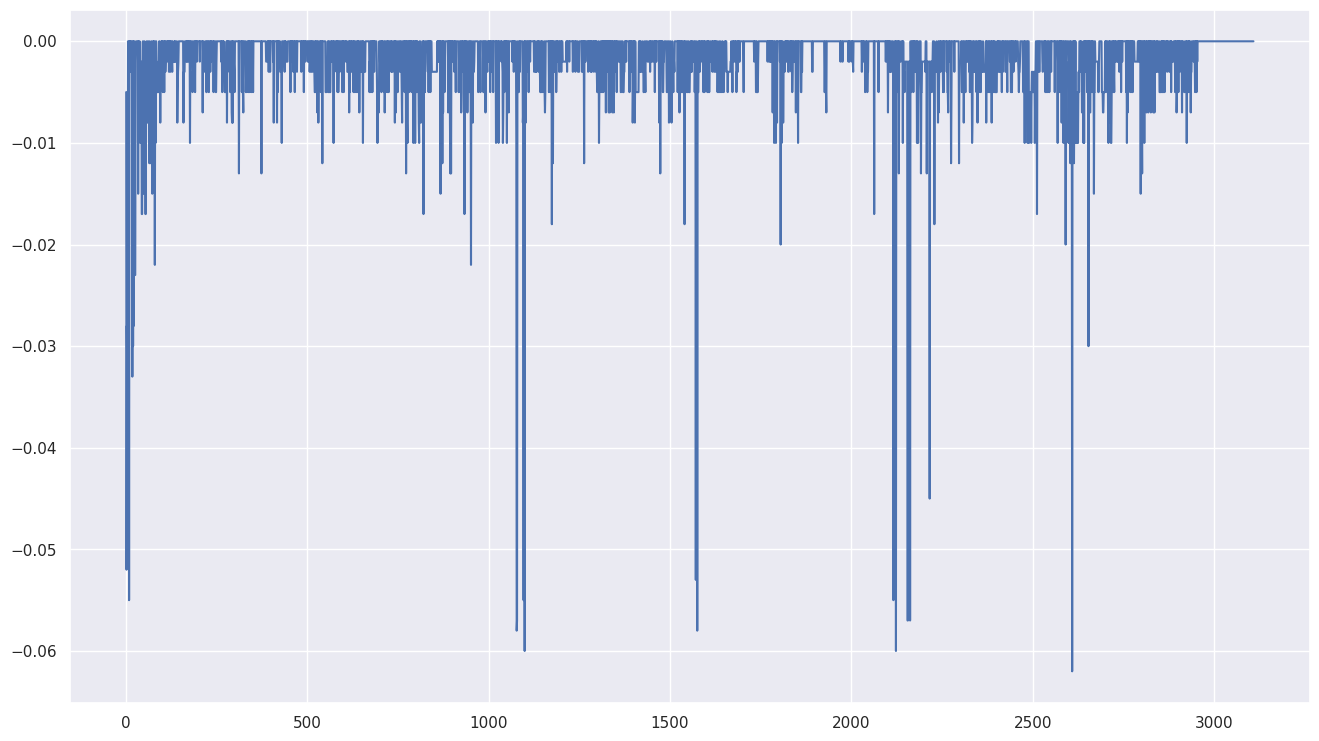

In [94]:
plt.plot(asks_before - asks_after)

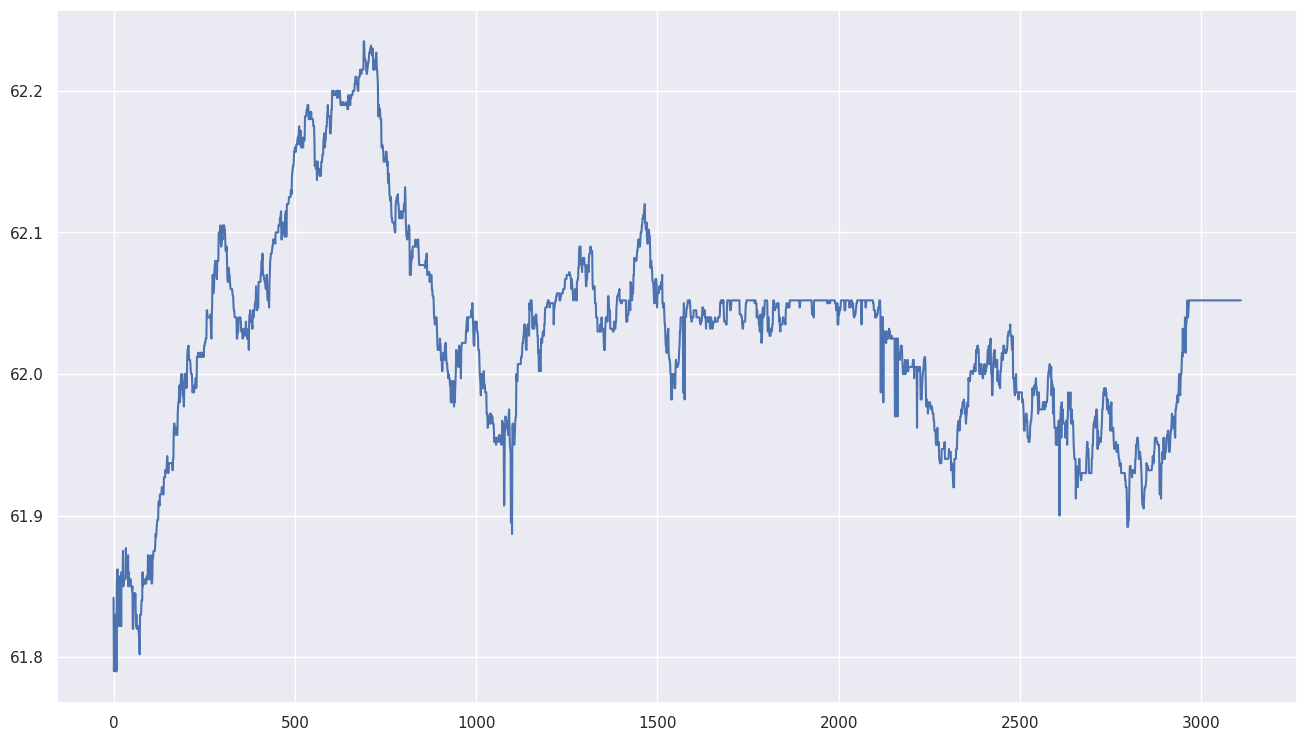

In [95]:
plt.plot(asks_before)